## Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pickle

## Data preprocessing

In [2]:
# Load Data
train_data = pd.read_csv('Train Data.csv')
test_data = pd.read_csv('Test Data.csv')

In [3]:
# Convert Data framse to numpy array
train_data = np.array(train_data)
test_data = np.array(test_data)

In [4]:
# Inputs and outputs
x_train = train_data[:,1:]
y_train = train_data[:,0].reshape(x_train.shape[0], 1)
x_test = test_data   #There is no outputs for test data

It is the number :  [6]


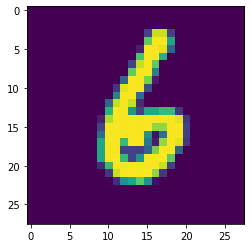

In [5]:
#Visualize the data (Images)
nbr_image = 160 # between 0 and 41999 (from train data)
plt.imshow(x_train[nbr_image].reshape(28, 28))
print('It is the number : ', y_train[nbr_image])
plt.show()

## Build the model

In [6]:
# Rectified linear unit function  (Activation function)
def ReLU(z):
    return np.maximum(0, z)

In [7]:
# Derivative of ReLU function
def dReLU(z):
    return np.array(z > 0, dtype='int32')

In [8]:
# Softmax function (Activation function)
def softmax(z):
    n, m = z.shape
    z = np.exp(z)
    sum_cols = np.sum(z, axis=0) # sum of every column
    for j in range(m):
        z[:,j] = z[:,j] / sum_cols[j] # devide every element of the jth column by his sum
    return z

In [9]:
# Get predictions
def get_predictions(A3):
    #the index of the maximum number of every column
    return np.argmax(A3, 0).reshape(A3.shape[1], 1)

In [10]:
# Get accuracy
def get_accuracy(predictions, y):
    return 100 * np.sum(predictions == y) / y.size

In [11]:
# Create the neural network of our example
def neural_network(X, y, alpha, iterations):
    '''Create NN with one hidden layer (10 nodes)
   Input layer : 784 input nodes
   Output layer : 10 output [0 1 ....9] '''
    
    # Number of examples and features
    m, n = X.shape
    
    # Organize X and Y for the calcul 
    X = X.T / 255    # nxm (rescal the data)
    
    # y mx1 shoud convert it to 10xm matrix with just zeros and ones
    Y = np.zeros((10, m))
    for e, i in zip(y, range(m)):
        Y[int(e), i] = 1

    # Initialise the weights (W) and the biases (b)
    # Weights and biases of the frist Layer
    W1 = np.random.rand(10, n)/1000                # 10xn
    b1 = np.random.rand(10, 1)/1000                # 10x1
    
    # Weights and biases of second Layer
    W2 = np.random.rand(10, 10)                    # 10x10
    b2 = np.random.rand(10, 1)                     # 10x1
    
    accuracy_list = []
    for i in range(iterations):
        
        # Forward propagation
        B1 = np.dot(b1, np.ones((1, m)))                      # 10xm
        B2 = np.dot(b2, np.ones((1, m)))                      # 10x10
        
        Z2 = np.dot(W1, X) + B1                               # 10Xm
        A2 = ReLU(Z2)                                         # 10xm
        
        Z3 = np.dot(W2, A2) + B2                              # 10Xm 
        A3 = softmax(Z3)                                      # 10Xm 
        
        # Backward propagation
        dZ3 = A3 - Y                                          # 10xm
        dW2 = (1/m) * np.dot(dZ3, A2.T)                       # 10x10
        db2 = ((1/m) * np.sum(dZ3, axis = 1)).reshape(10, 1)  # 10x1
        
        dZ2 = np.dot(W2.T, dZ3) * dReLU(A2)                   # 10xm
        dW1 = (1/m) * np.dot(dZ2, X.T)                        # 10xn
        db1 = ((1/m) * np.sum(dZ2, axis = 1)).reshape(10, 1)  # 10x1
        
        # Update weights and biases
        W1 += - alpha * dW1
        b1 += - alpha * db1
        W2 += - alpha * dW2
        b2 += - alpha * db2
        
        # Watch the developement of the accurancy throught the training
        if i % 5 == 0 :
            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, y)
            accuracy_list.append(accuracy)
            print('Iteration : ', i)
            print('Accurancy : ', round(accuracy, 2), '%')
            print('----------------------------------------')
     
    return W1, b1, W2, b2, accuracy_list

In [12]:
# Train the model and return W1, b1, W2, b2
alpha = 0.01
iterations = 1100
W1, b1, W2, b2, accuracy_list = neural_network(x_train, y_train, alpha, iterations)

Iteration :  0
Accurancy :  9.82 %
----------------------------------------
Iteration :  5
Accurancy :  17.14 %
----------------------------------------
Iteration :  10
Accurancy :  16.8 %
----------------------------------------
Iteration :  15
Accurancy :  16.7 %
----------------------------------------
Iteration :  20
Accurancy :  16.69 %
----------------------------------------
Iteration :  25
Accurancy :  16.68 %
----------------------------------------
Iteration :  30
Accurancy :  16.69 %
----------------------------------------
Iteration :  35
Accurancy :  16.75 %
----------------------------------------
Iteration :  40
Accurancy :  16.9 %
----------------------------------------
Iteration :  45
Accurancy :  17.37 %
----------------------------------------
Iteration :  50
Accurancy :  18.44 %
----------------------------------------
Iteration :  55
Accurancy :  20.03 %
----------------------------------------
Iteration :  60
Accurancy :  21.69 %
---------------------------------

Iteration :  525
Accurancy :  76.83 %
----------------------------------------
Iteration :  530
Accurancy :  77.14 %
----------------------------------------
Iteration :  535
Accurancy :  77.45 %
----------------------------------------
Iteration :  540
Accurancy :  77.74 %
----------------------------------------
Iteration :  545
Accurancy :  78.02 %
----------------------------------------
Iteration :  550
Accurancy :  78.28 %
----------------------------------------
Iteration :  555
Accurancy :  78.52 %
----------------------------------------
Iteration :  560
Accurancy :  78.82 %
----------------------------------------
Iteration :  565
Accurancy :  79.07 %
----------------------------------------
Iteration :  570
Accurancy :  79.26 %
----------------------------------------
Iteration :  575
Accurancy :  79.52 %
----------------------------------------
Iteration :  580
Accurancy :  79.78 %
----------------------------------------
Iteration :  585
Accurancy :  79.99 %
--------------

Iteration :  1045
Accurancy :  85.97 %
----------------------------------------
Iteration :  1050
Accurancy :  86.0 %
----------------------------------------
Iteration :  1055
Accurancy :  86.02 %
----------------------------------------
Iteration :  1060
Accurancy :  86.05 %
----------------------------------------
Iteration :  1065
Accurancy :  86.07 %
----------------------------------------
Iteration :  1070
Accurancy :  86.11 %
----------------------------------------
Iteration :  1075
Accurancy :  86.14 %
----------------------------------------
Iteration :  1080
Accurancy :  86.16 %
----------------------------------------
Iteration :  1085
Accurancy :  86.2 %
----------------------------------------
Iteration :  1090
Accurancy :  86.22 %
----------------------------------------
Iteration :  1095
Accurancy :  86.24 %
----------------------------------------


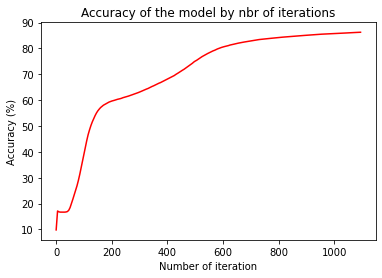

In [14]:
# Visual the accuracy
nbr_iteration = np.arange(0, iterations, 5)
plt.plot(nbr_iteration, accuracy_list, color = 'r')
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of the model by nbr of iterations')
plt.show()

## Save the model

In [24]:
# Save the model using the pickle model
# By saving the weight and the biases
model = {}
model['W1'] = W1
model['b1'] = b1
model['W2'] = W2
model['b2'] = b2

model_file = open('savedModel', 'ab')
pickle.dump(model, model_file)
model_file.close()

# To load the weights and biases from the Model file
#model_file = open('savedModel', 'rb')     
#model = pickle.load(model_file)
#W1 = model['W1'] 
#b1 = model['b1'] 
#W2 = model['W2'] 
#b2 = model['b2']
#model_file.close()

## Test the model

In [25]:
# Function that gets the predicted number
def predict_nbr(image_data):
    Z2 = np.dot(W1, image_data/255) + b1  # 10X1
    A2 = ReLU(Z2)                         # 10x1   
    Z3 = np.dot(W2, A2) + b2              # 10X1
    A3 = softmax(Z3)                      # 10X1
    nbr = np.argmax(A3, 0)
    return nbr

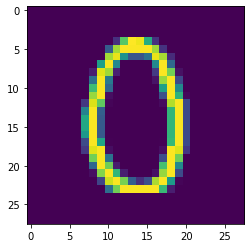

the number on the image is :  [0]


In [28]:
# Visualize the tested image
nbr_image = 23041  # between 0 and 27999 (from test data)
plt.imshow(x_test[nbr_image].reshape(28, 28))
plt.show()

# Predicted number by the model
image_data = x_test[nbr_image].reshape(x_test.shape[1], 1)
predicted_nbr = predict_nbr(image_data)

print("the number on the image is : ", predicted_nbr)